<a href="https://colab.research.google.com/github/andrebelem/ASTOC/blob/main/SNIPPETS_1_Retirar_uma_s%C3%A9rie_temporal_de_%C3%A1rea_%5BMaterial_de_Refer%C3%AAncia%5D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%%capture
!pip install erddap-python

In [2]:
from erddapClient import ERDDAP_Griddap

remote = ERDDAP_Griddap('https://apdrc.soest.hawaii.edu/erddap', 'hawaii_soest_9b47_cf3a_6066')
subset = (remote.setResultVariables('u').setSubset(
    time=slice("1993-03-01","2020-03-01"),
    latitude=slice(-23,-18),
    longitude=slice(310,330))
    .getxArray())

/usr/local/lib/python3.10/dist-packages/erddapClient/erddap_griddap_dimensions.py:196: FutureWarning: Passing method to Int64Index.get_loc is deprecated and will raise in a future version. Use index.get_indexer([item], method=...) instead.
  idx = self.values.index.get_loc(value, method=method)
/usr/local/lib/python3.10/dist-packages/erddapClient/erddap_griddap_dimensions.py:196: FutureWarning: Passing method to Int64Index.get_loc is deprecated and will raise in a future version. Use index.get_indexer([item], method=...) instead.
  idx = self.values.index.get_loc(value, method=method)
/usr/local/lib/python3.10/dist-packages/erddapClient/erddap_griddap_dimensions.py:196: FutureWarning: Passing method to Float64Index.get_loc is deprecated and will raise in a future version. Use index.get_indexer([item], method=...) instead.
  idx = self.values.index.get_loc(value, method=method)
/usr/local/lib/python3.10/dist-packages/erddapClient/erddap_griddap_dimensions.py:196: FutureWarning: Passing 

In [3]:
subset

<xarray.Dataset>
Dimensions:    (time: 9863, latitude: 21, longitude: 81)
Coordinates:
  * time       (time) object 1993-03-01 00:00:00 ... 2020-03-01 00:00:00
  * latitude   (latitude) float64 -23.0 -22.75 -22.5 ... -18.5 -18.25 -18.0
  * longitude  (longitude) float64 310.0 310.2 310.5 310.8 ... 329.5 329.8 330.0
Data variables:
    u          (time, latitude, longitude) float32 ...
Attributes: (12/29)
    cdm_data_type:              Grid
    Conventions:                COARDS, CF-1.6, ACDD-1.3
    creator_email:              podaac@podaac.jpl.nasa.gov
    creator_name:               APDRC
    creator_type:               institution
    creator_url:                https://podaac.jpl.nasa.gov/
    ...                         ...
    standard_name_vocabulary:   CF Standard Name Table v29
    summary:                    Physical Oceanography Distributed Active Arch...
    time_coverage_end:          2020-12-31T00:00:00Z
    time_coverage_start:        1993-01-01T00:00:00Z
    title:                      PODAAC oscar local quarter deg v2.0 final
    Westernmost_Easting:        0.0

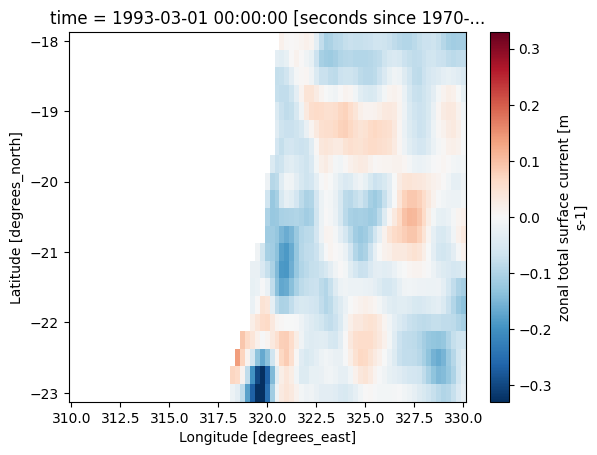

In [4]:
subset.u.isel(time=0).plot()

In [5]:
import geopandas as gpd
from shapely.geometry import Polygon

# Definir as coordenadas dos vértices do polígono
coords = [(322.5, -21), (322.5, -20), (327.5, -20), (327.5, -21)]

# Criar um objeto Polygon com as coordenadas dos vértices
polygon_geom = Polygon(coords)

# Criar um DataFrame com o Polygon
data = {'geometry': [polygon_geom]}
gdf = gpd.GeoDataFrame(data, crs='EPSG:4326')

# Definir o sistema de coordenadas de referência (CRS) para o WGS 84
gdf.crs = 'EPSG:4326'

# Salvar o GeoDataFrame em um arquivo Shapefile
gdf.to_file("polygon_shapefile.shp")


<Axes: >

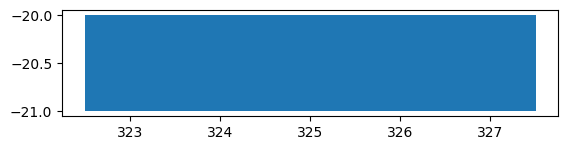

In [7]:
gdf.plot()

In [8]:
!pip install salem
!pip install rasterio

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.9/85.9 kB 1.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.6/20.6 MB 47.5 MB/s eta 0:00:00


In [10]:
import salem
ds = subset.salem.subset(shape=gdf,margin=4) # faz um subset

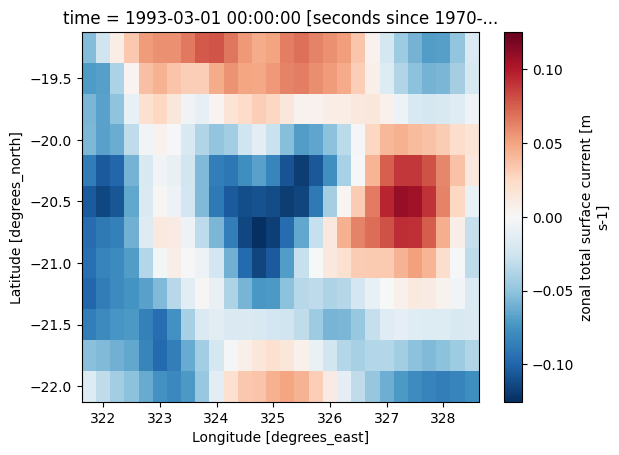

In [12]:
ds.u.isel(time=0).plot()

In [13]:
ds_limpo = ds.salem.roi(shape=gdf) # note que agora o salem "limpa" tudo que tem na volta do shape

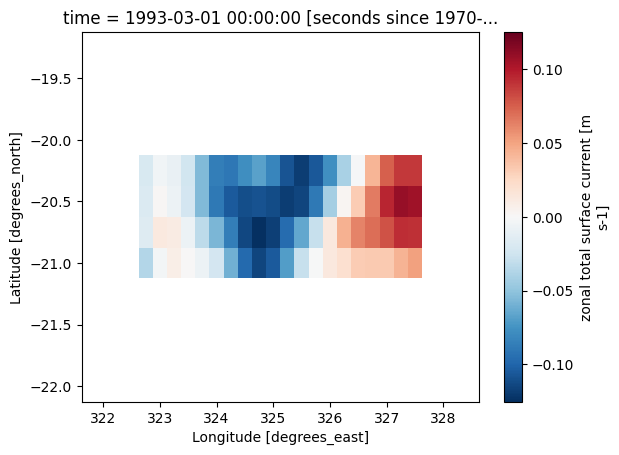

In [14]:
ds_limpo.u.isel(time=0).plot()

In [19]:
# magic !! Vou corrigir a grade rotacionando as longitudes
# extrai as series temporais
df_mean = ds_limpo.u.mean(dim=('latitude','longitude')).to_dataframe().reset_index()
df_median = ds_limpo.u.median(dim=('latitude','longitude')).to_dataframe().reset_index()
df_std = ds_limpo.u.std(dim=('latitude','longitude')).to_dataframe().reset_index()

In [22]:
import pandas as pd
df_mean.index = pd.to_datetime(df_mean.time.astype(str))

<Axes: xlabel='time'>

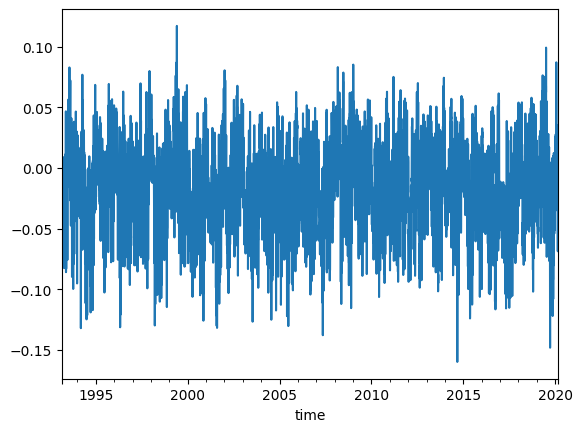

In [23]:
df_mean.u.plot()